# **Aim of the Notebook**

In this Notebook I will be dealing with the Mushroom Classification by using Decision Tree Classifier using both Entropy and Gini Index.

For the first step of this notebook, I will work on the Exploratory Data Analysis of this dataset by using Seaborn, Matplotlib and Plotly libraries.

For the next step, I will deal with the missing data points (if they exist), and then encode the dataset for the data pre-processing step.

Finally, I will train Decision Tree Classifier Model using both Entropy and Gini Index.

# **What is Decision Tree ?**
A Decision Tree  is a predictive modeling approach. It is used to address classification problems in statistics, data mining, and machine learning.

It is having a tree-like structure upside down and represents decisions or for decision-making. It can handle high dimension data and have good accuracy.

The topmost node is called the root node which has no incoming edges. An internal node represents a test or an attribute and each branch represents an outcome of a test and each terminal node or leaf holds a class. It has one incoming edge and has two or more outgoing edges. Terminal node or Leaf node represents a class node and has exactly one incoming node and no outgoing node.

Classifiers are used when the target variable is categorical. Here value obtained by a terminal node is the mode of response falling in that region and any unseen data or observation in this region will make a prediction based on the mode value.

The decision to make a strategic split heavily affects the accuracy of the tree and the decision criteria for regression and classification trees will be different. Entropy/Information gain or Gini Index can be used for choosing the best split. Entropy and Information gain go hand in hand.

For a given dataset with different features, to decide which feature to be considered as the root node and which feature should be the next decision node and so on, information gain of each feature should be known. The feature which has maximum information gain will be considered as the root node. To calculate information gain first we should calculate the entropy.

# **Entropy**
Entropy is a measure of disorder or impurity in the given dataset. In the decision tree, messy data are split based on values of the feature vector associated with each data point. With each split, the data becomes more homogenous which will decrease the entropy. However, some data in some nodes will not be homogenous, where the entropy value will not be small. The higher the entropy, the harder it is to draw any conclusion. When the tree finally reaches the terminal or leaf node maximum purity is added.

# **Gini Index**
The Gini index can also be used for feature selection. The tree chooses the feature that minimizes the Gini impurity index. The higher value of the Gini Index indicates the impurity is higher. Both Gini Index and Gini Impurity are used interchangeably. The Gini Index or Gini Impurity favors large partitions and is very simple to implement. It performs only binary split. For categorical variables, it gives the results in terms of "success" or "failure".

# **Pruning**
When the tree is fully grown up, it is liking to overfit data due to noise or outliers which can lead to anomalies in decision trees. Which in turn leads to poor accuracy. This can be handled by using pruning. Pruning is the process of removing redundant comparisons or removing subtrees. Pruning reduces unnecessary comparisons and achieves better performance. Pruned trees are less complex, smaller, and easy to understand

# **Importing Required Libraries**

In [73]:
# Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns
import plotly.graph_objects as go

# **Importing Dataset**

In [74]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [75]:
df = pd.read_csv("/content/gdrive/MyDrive/Text and Image Analytics/Unit 1/mushrooms.csv")

In [76]:
# Importing dataset
#df = pd.read_csv("mushrooms.csv")

In [77]:
# reading data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


As seen from above, our dataset has 23 columns. Each column has a different feature of the mushrooms which are the column names of the dataset.

# **Exploratory Data Analysis**

In [78]:
# checking total null values
df.isnull().sum().sum()

0

There are no null values in the dataset.

In [125]:
# Information of dataset like column names, no: of non-null count and null count if any, and the data type can be checked by using dataset.info().
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All the features are categorical and there are no missing values.

In [80]:
df['class'].unique()

array(['p', 'e'], dtype=object)

The class column is target and it has two clasification which describes if mushroom is poisonous or edible. In class column posionous is p and edible is e.

In [81]:
#To find number of rows and column
df.shape

(8124, 23)

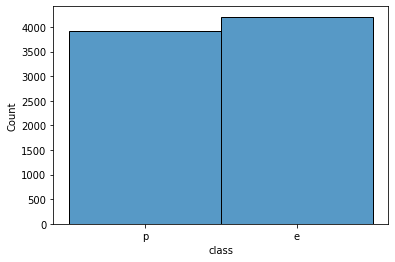

In [82]:
sns.histplot(df['class'])

# **Visualising Distribution of Mushrooms**
Now I will visualize each feature by its class distribution. The "class" refers that the information of this mushroom is edible or poisonous.

# **Distribution of Mushrooms by their Classes**

In [83]:
labels = ['Edible', 'Poisonous']
values = [df.describe()['class']['freq'], df.describe()['class']['count']-df.describe()['class']['freq']]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', title_x=0.5, title_font=dict(size=28))
fig.show()

The red part represents that the percentage of the poisonous mushrooms in the dataset. The green part represents that the percentage of edible mushrooms. The percentages of these classes are pretty close to each other. From now on, I will represent the red color for the poisonous class and green for the edible class of the mushrooms.

## **Distribution of Mushrooms by their Classes and Cap-Shapes**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Shapes')

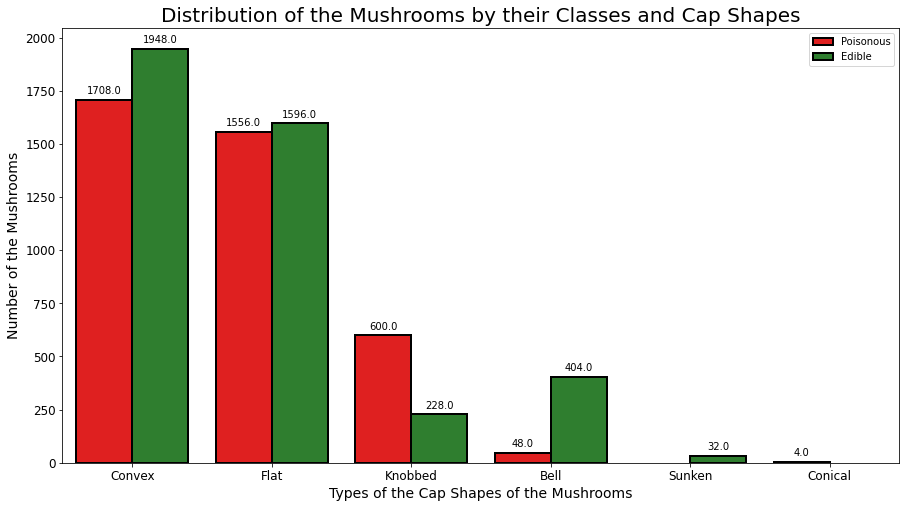

In [84]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='cap-shape',
                      hue='class',
                      order=df['cap-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Shapes', fontsize=20)

The x-axis represents that the Types of the Cap Shapes of the Mushrooms and the y-axis represents that the Number of the Mushrooms. The Convex Cap Shape is the most frequent. The Edible and Poisonous class mushrooms are pretty close to each other for the Convex and the Flat type. In contrast, for the following types which are Kobbed and Bell, the class types are pretty imbalanced distributed. The Sunken and the Conical types are completely edible.

## **Distribution of the Mushrooms by their Classes and Cap Surfaces**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Surfaces')

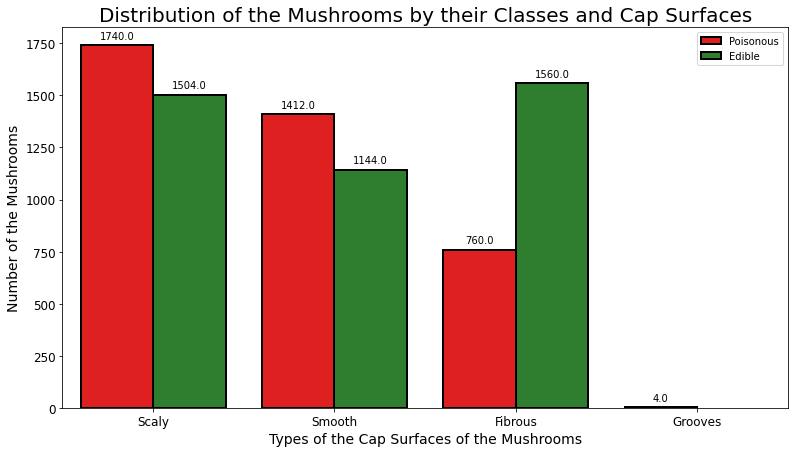

In [85]:
plt.figure(figsize=(13, 7))
splot = sns.countplot(data=df, x='cap-surface',
                      hue='class',
                      order=df['cap-surface'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Scaly', 'Smooth', 'Fibrous', 'Grooves'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Surfaces of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Surfaces', fontsize=20)

The x-axis represents that the Types of the Cap Surfaces of the Mushrooms and the y-axis represents that the Number of the Mushrooms. The Scaly and Smooth types are high probability poisonous. In contrast, the Fibrous type is mostly edible.

## **Distribution of Mushrooms by their Classes and Cap colours**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes and Cap Colors')

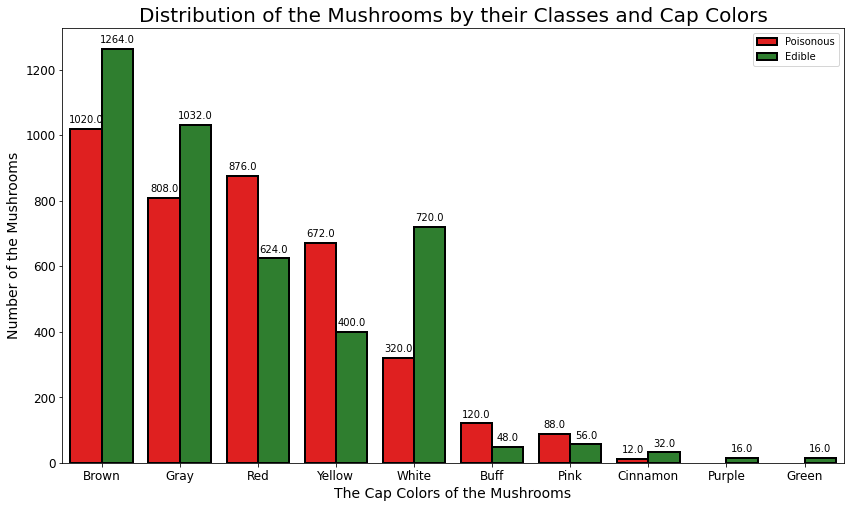

In [86]:
plt.figure(figsize=(14, 8))
splot = sns.countplot(data=df, x='cap-color',
                      hue='class',
                      order=df['cap-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Cap Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Colors', fontsize=20)

 The x-axis represents that The Cap Colors of the Mushrooms and the y-axis represents that the Number of the Mushrooms. The Edible and Poisonous class mushrooms are pretty close to each other for Brown, Gray, and Red cap colors. The White cap-colored mushrooms are highly edible. Purple and Green cap-colored mushrooms have no poisonous class.

## **Distribution of Mushrooms by Classes and Bruises** 

Text(0.5, 1.0, 'Distribution of the Mushrooms by Classes and Bruises')

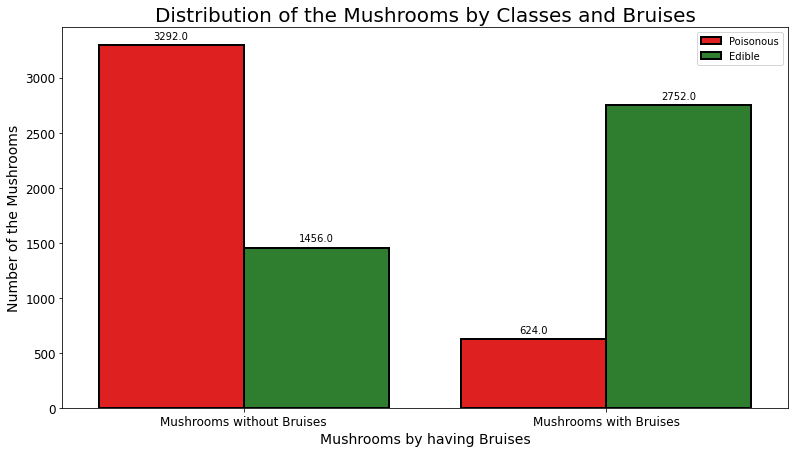

In [87]:
plt.figure(figsize=(13, 7))
splot = sns.countplot(data=df, x='bruises',
                      hue='class',
                      order=df['bruises'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Mushrooms without Bruises', 'Mushrooms with Bruises'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Mushrooms by having Bruises', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Bruises', fontsize=20)

 The x-axis represents that mushrooms by having Bruises and, the y-axis represents that the Number of Mushrooms. As you can see, Mushrooms without Bruises are high frequently poisonous. In contrast, the Mushrooms with the Bruises are highly edible.

## **Distribution of Mushrooms by Classes and Odour**

Text(0.5, 1.0, 'Distribution of the Mushrooms by Classes and Odor')

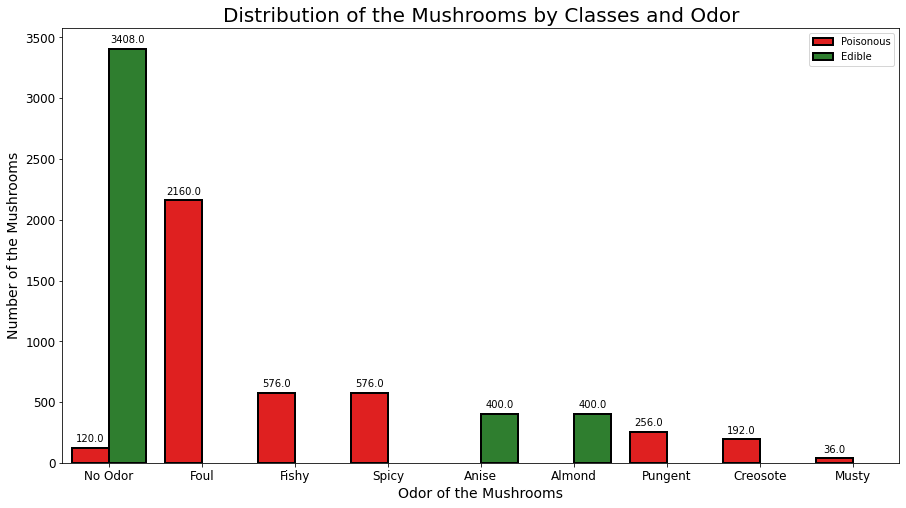

In [88]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='odor',
                      hue='class',
                      order=df['odor'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['No Odor', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent',
                       'Creosote', 'Musty'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Odor of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Odor', fontsize=20)

The x-axis represents that the Odor of the Mushrooms and, the y-axis represents that the Number of Mushrooms. According to the graph above, mushrooms with no odor are highly safe for humans. But the mushrooms with the Foul, Fishy, and Spicy odor are high frequently poisonous. The mushrooms with the Anise and Almond odor have no poisonous class.

## **Distribution of Mushrooms by their Classes vs Gill Attachments**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Gill Attachments')

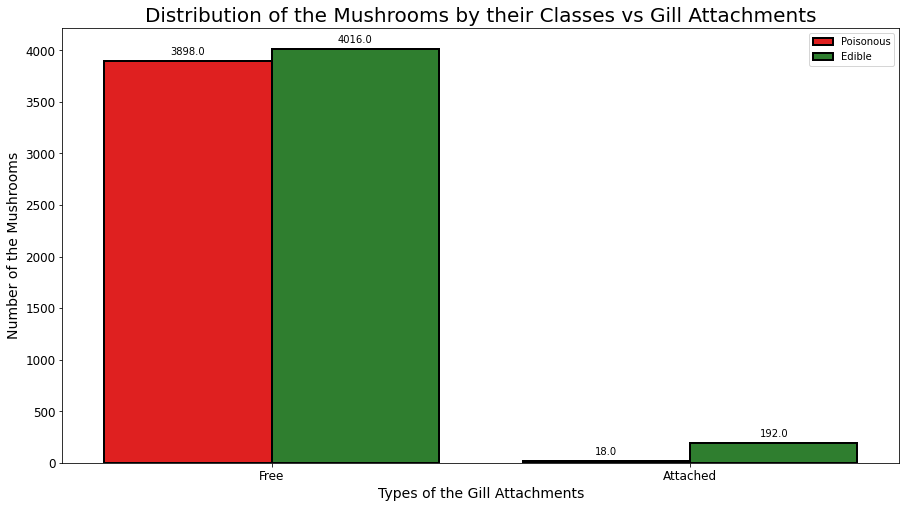

In [89]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='gill-attachment',
                      hue='class',
                      order=df['gill-attachment'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Free', 'Attached'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Attachments', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Attachments', fontsize=20)

The x-axis represents that the Types of the Gill Attachments and, the y-axis represents that the Number of Mushrooms. The dataset has high frequently Free type gill attachments. According to this graph, the Free type gill attachments are approximately equally distributed. In contrast, the Attached type gill attachments are most frequently edible.

## **Distribution of Mushrooms by their Classes vs Gill Spacing**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Gill Spacing')

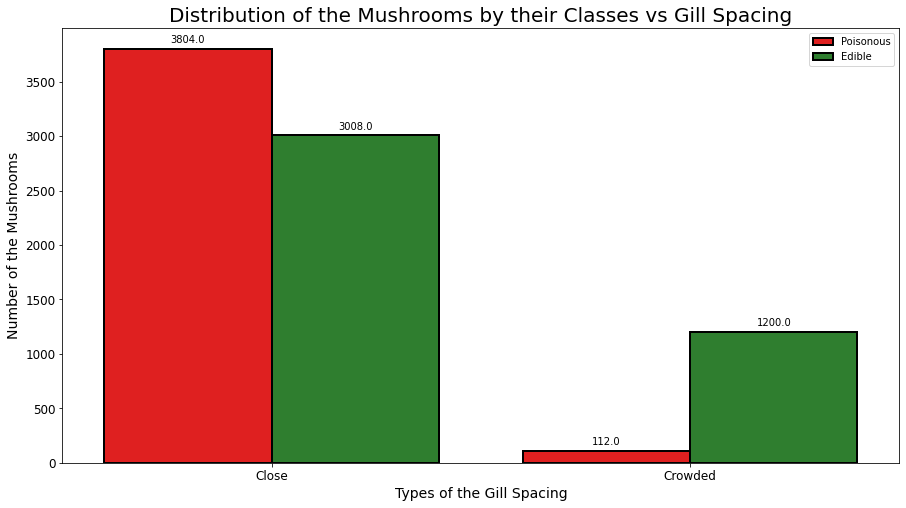

In [90]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='gill-spacing',
                      hue='class',
                      order=df['gill-spacing'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Close', 'Crowded'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Gill Spacing', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Spacing', fontsize=20)

The x-axis represents that the Types of the Gill Spacing and, the y-axis represents that the Number of Mushrooms. According to this figure, the Crowded type gill spacing is high frequently edible. In contrast, we cannot say the same thing for the Close-type gill spacing mushrooms. Their class distribution by gill spacing is pretty close to each other.

## **Distribution of Mushrooms by their Classes vs Gill Colors**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Gill Colors')

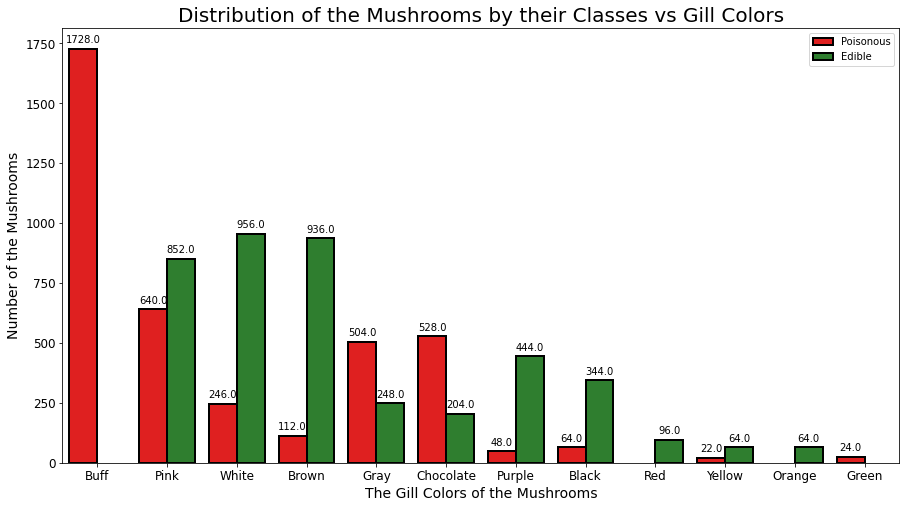

In [91]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='gill-color',
                      hue='class',
                      order=df['gill-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Gill Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Gill Colors', fontsize=20)

The x-axis represents that the Types of the Gill Colors and, the y-axis represents that the Number of Mushrooms. As seen from the figure above, the Buff-colored gills are highly poisonous. In contrast, the White, Brown, Purple, Black, and Red gill colors are high frequently edible.

## **Distribution of Mushrooms by their Classes vs Stalk Shapes**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stalk Shapes')

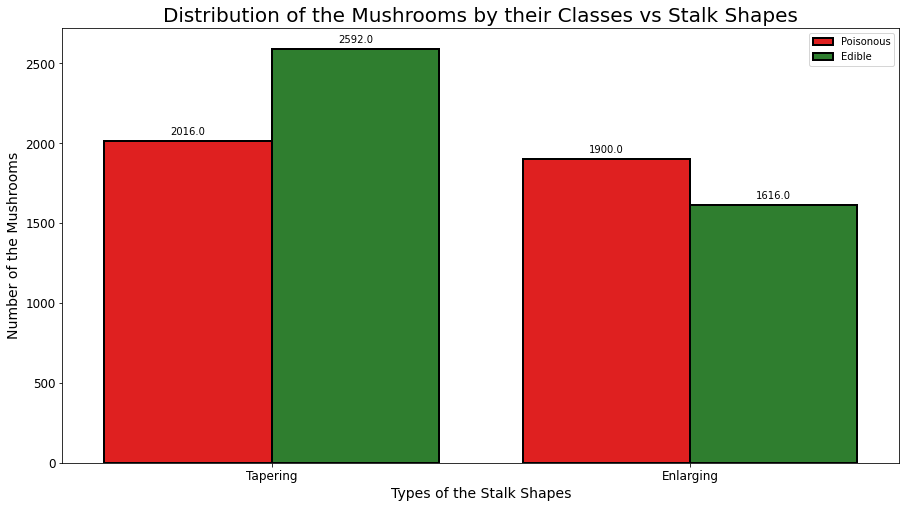

In [92]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='stalk-shape',
                      hue='class',
                      order=df['stalk-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Tapering', 'Enlarging'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Shapes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Shapes', fontsize=20)

## **Distribution of Mushrooms by their Classes vs Stalk Surface above Rings**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stalk Surfaces Above Ring')

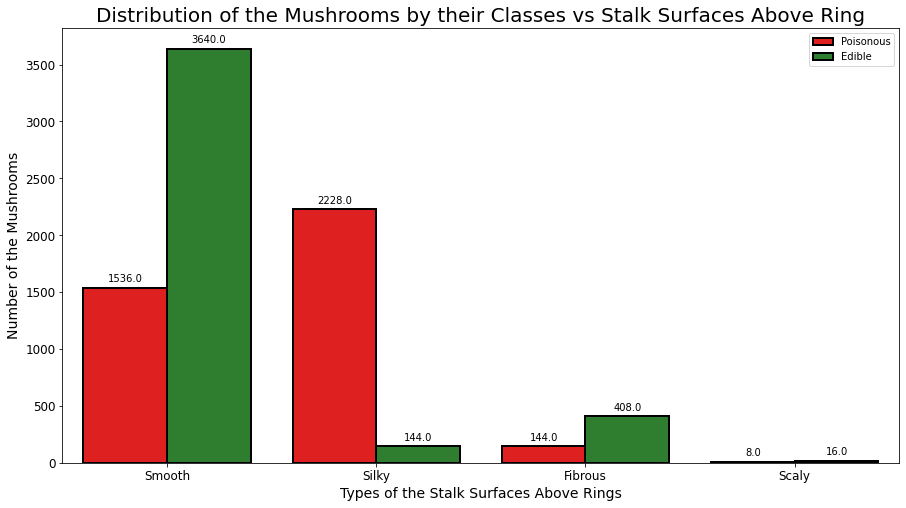

In [94]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='stalk-surface-above-ring',
                      hue='class',
                      order=df['stalk-surface-above-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surfaces Above Rings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Surfaces Above Ring', fontsize=20)

## **Distribution of Mushrooms by their Classes vs Stalk Surface below Rings**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stalk Surfaces Below Ring')

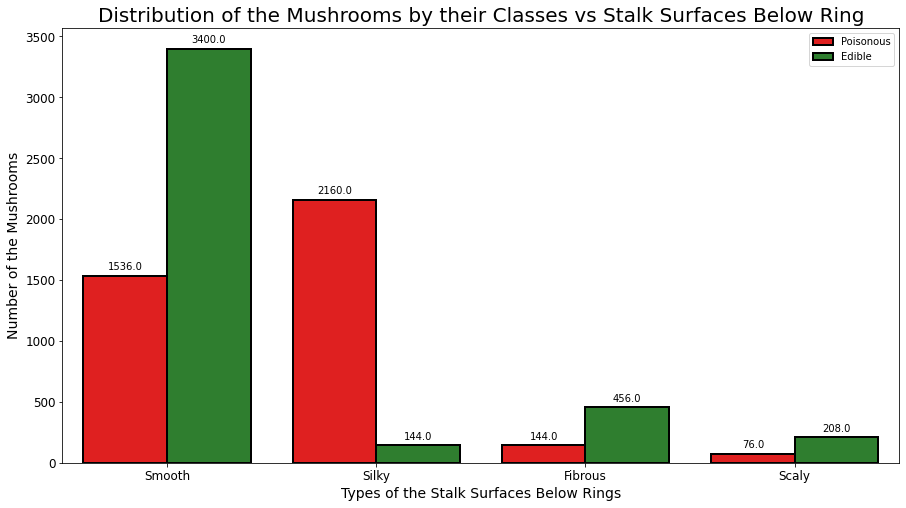

In [95]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='stalk-surface-below-ring',
                      hue='class',
                      order=df['stalk-surface-below-ring'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surfaces Below Rings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Surfaces Below Ring', fontsize=20)

## **Distribution of Mushrooms by their Classes vs Veil types**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Veil Types')

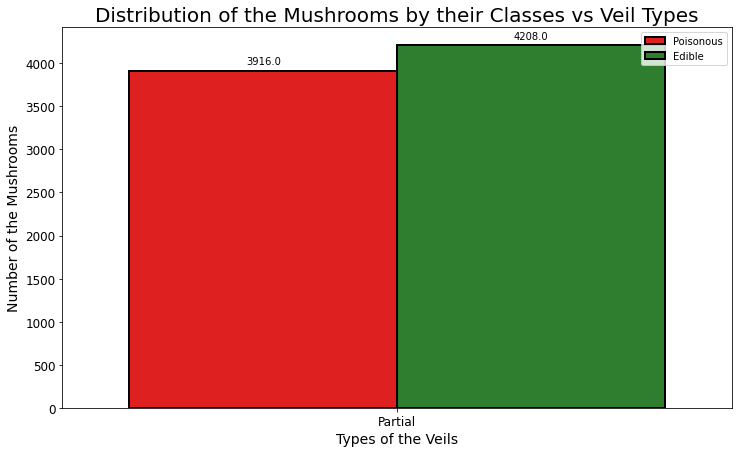

In [96]:
plt.figure(figsize=(12, 7))
splot = sns.countplot(data=df, x='veil-type',
                      hue='class',
                      order=df['veil-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Partial'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Veils', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Veil Types', fontsize=20)

The x-axis represents the Veil Types and, the y-axis represents that the Number of Mushrooms. In this dataset, we have only Partial type Veils. As you can see, most of them are edible but the number of the poisonous class mushrooms are pretty close to the edible class of mushrooms.

## **Distribution of Mushrooms by their Classes vs Veil Colors**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Veil Colors')

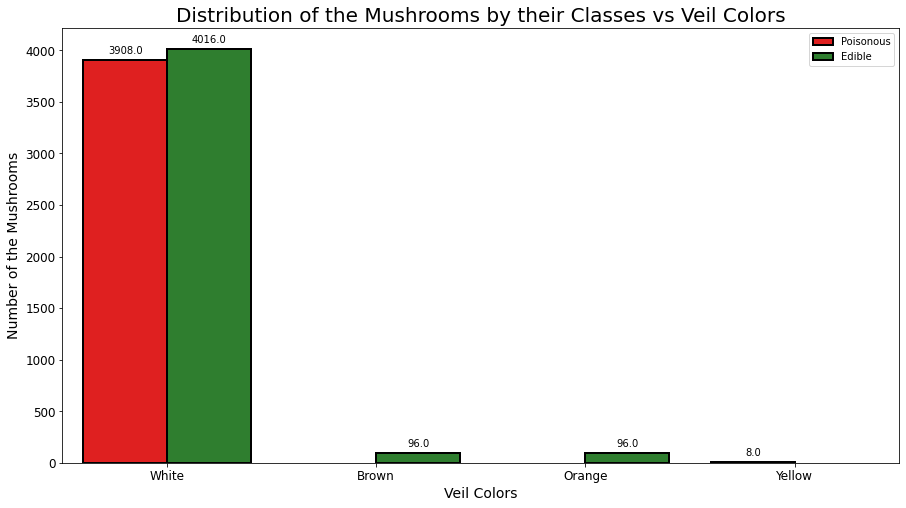

In [97]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='veil-color',
                      hue='class',
                      order=df['veil-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Orange', 'Yellow'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Veil Colors', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Veil Colors', fontsize=20)

The x-axis represents the Veil Colors and, the y-axis represents that the Number of Mushrooms. According to our dataset, most of the mushrooms have White colors. The class distribution of the White-colored Veils is approximately equal. The Brown, Orange, and Yellow Veil-colored mushrooms have no poisonous class.

## **Distribution  of Mushrooms by their Classes vs Ring types**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Ring Types')

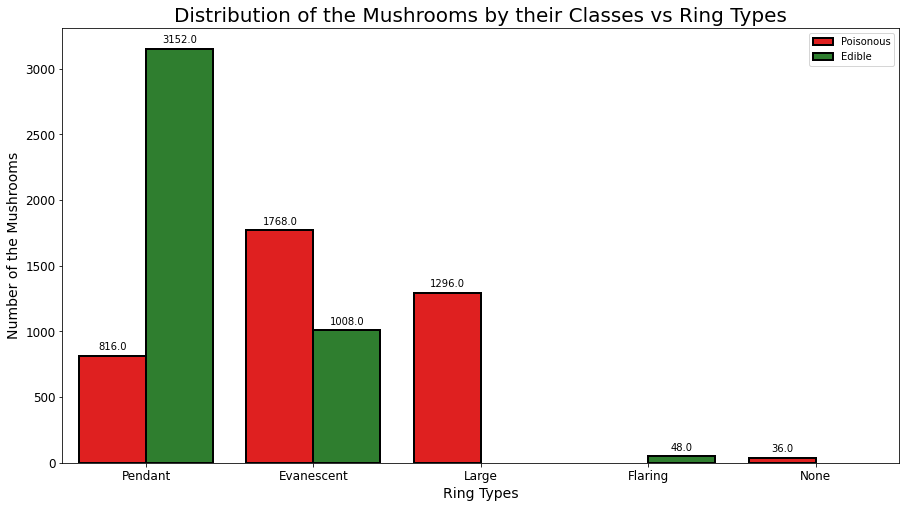

In [98]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='ring-type',
                      hue='class',
                      order=df['ring-type'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Pendant', 'Evanescent', 'Large', 'Flaring', 'None'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Ring Types', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Ring Types', fontsize=20)

The x-axis represents the Ring Types and, the y-axis represents that the Number of Mushrooms. As seen from the graph, the mushrooms with the Pendant type are high frequently edible. In contrast, the mushrooms with the Large type have only the poisonous class.

## **Distribution of Mushrooms by their Classes vs Spore Print color**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Spore Print Color')

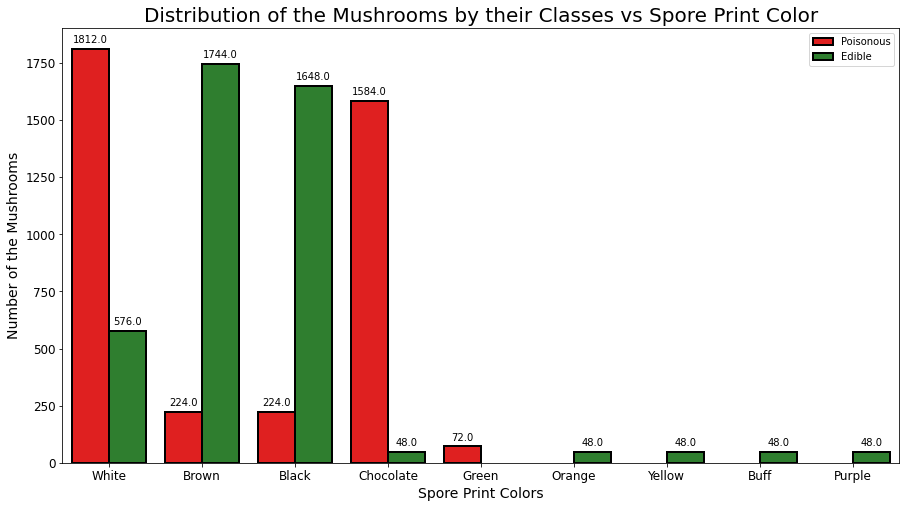

In [99]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='spore-print-color',
                      hue='class',
                      order=df['spore-print-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Black', 'Chocolate', 'Green', 'Orange', 'Yellow', 'Buff', 'Purple'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Spore Print Colors', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Spore Print Color', fontsize=20)

The x-axis represents the Spore Pring Colors and, the y-axis represents that the Number of Mushrooms. As seen from the figure, the White and Chocolate spore print colored mushrooms are high frequently poisonous. In contrast, the mushrooms with the Brown and Black spore print colors are high frequently edible.

## **Distribution of Mushrooms by their Classes vs Population**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Populations')

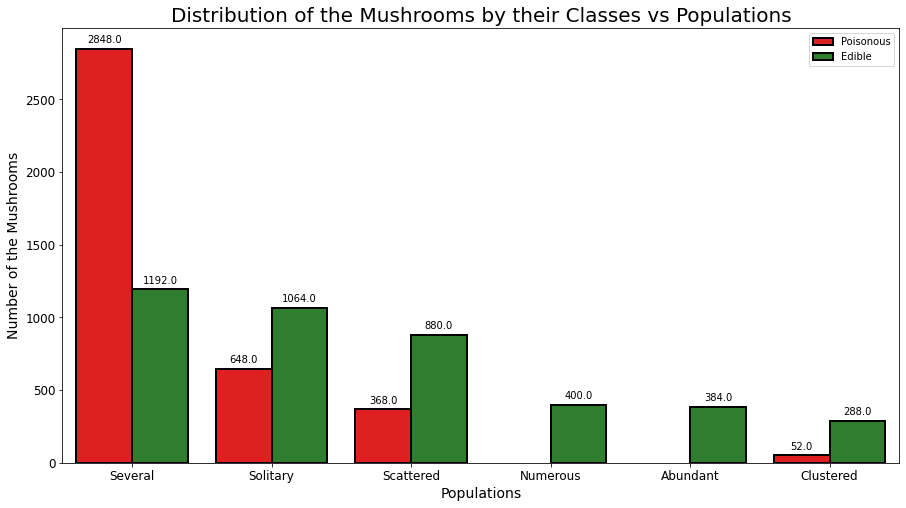

In [100]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='population',
                      hue='class',
                      order=df['population'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Populations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Populations', fontsize=20)

The x-axis represents the Populations and, the y-axis represents that the Number of Mushrooms. According to the graph above, the mushrooms populated as Several types are highly poisonous. In contrast, the mushrooms with Numerous, Abundant, and Clustered populations are pretty edible.

## **Distribution of Mushrooms by their Classes vs Habitats**

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Habitats')

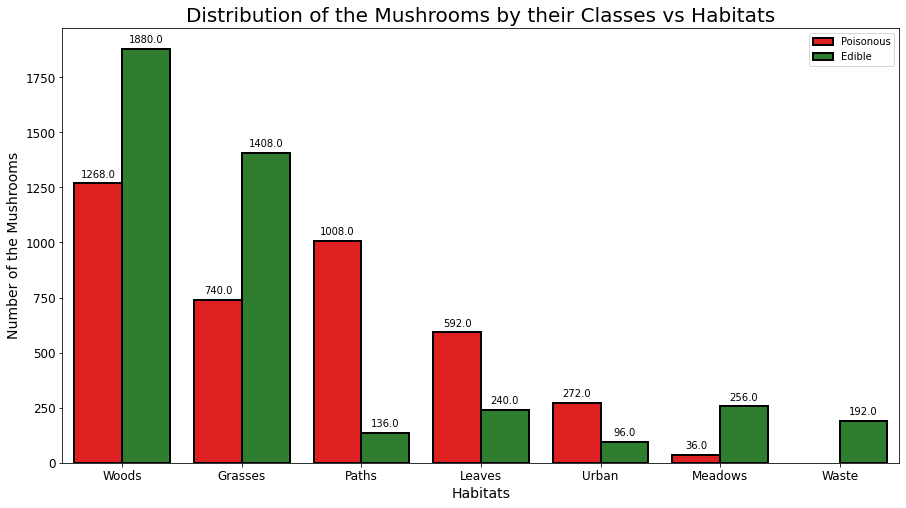

In [101]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='habitat',
                      hue='class',
                      order=df['habitat'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Habitats', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Habitats', fontsize=20)

## **Separating Features And Target**

Target is in column class. So X will have all values apart from column class and y will have column class.



In [102]:
X = df.drop(['class'],axis=1)
y = df['class']

As all the values in the dataset are categorical. X can be encoded using pandas dummy variable and y using LabelEncoder.

Features can be encoded using pandas dummy variable and target by using LabelEncoder.

Dummy variable creates a separate column for each unique value of the column, whereas LabelEncoder encodes target labels with values between 0 and n_classes-1. LabelEncoder should be used to encode target values, i.e. y, and not the input (features).

Before encoding features are assigned to X and target to y.

In [103]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [104]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


For y variable encoding is done as Poisonous = p -> 1 Edible = e -> 0

## **Splitting Dataset To Training And Test Data**
The dataset has to be split into a training set and a test set. This can be done by the function train_test_split function from the Model_selection module of the Scikit-learn library.



In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [106]:
X_train.shape , X_test.shape

((6499, 117), (1625, 117))

In [107]:
y_train.shape , y_test.shape

((6499,), (1625,))

# **Decision Tree Creation**
A decision tree classifier can be created using entropy and the Gini index. 

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [109]:
from sklearn.metrics import accuracy_score

## **Creation Of Decision Tree Using Gini Index**

In [110]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'X[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3076923076923077, 0.625, 'X[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.15384615384615385, 0.375, 'X[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.46153846153846156, 0.375, 'X[94] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.8461538461538461, 0.625, 'X[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.7692307692307693, 0.375, 'X[63] <= 0.5\ngini = 0.023\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.002\nsamples = 2740\nval

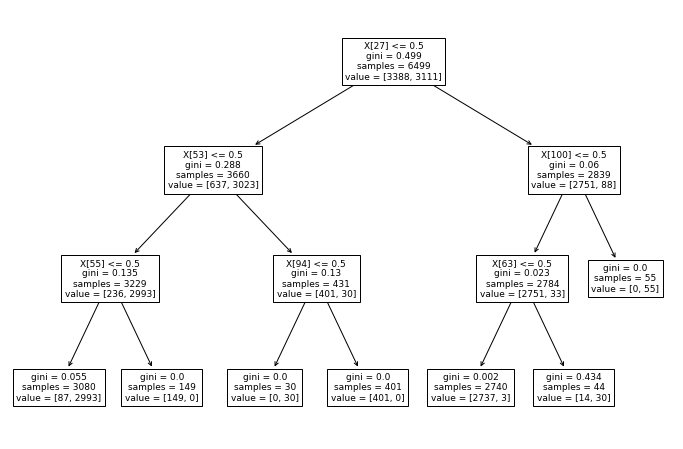

In [111]:
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [112]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)

Overfitting occurs when accuracy for traning set is high and test set is very low comparing to training set. Overfitting is very common problem with decision tree.

In [113]:
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 1, 1, 1])

In [114]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9902
Training-set accuracy score: 0.9840


Here accuracy of the model and training set indicates there is no sign of overfitting.

## **Creation Of Decision Tree Using Entropy**

In [115]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5555555555555556, 0.875, 'X[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3333333333333333, 0.625, 'X[20] <= 0.5\nentropy = 0.667\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.2222222222222222, 0.375, 'X[53] <= 0.5\nentropy = 0.976\nsamples = 1077\nvalue = [637, 440]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.933\nsamples = 676\nvalue = [236, 440]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 2583\nvalue = [0, 2583]'),
 Text(0.7777777777777778, 0.625, 'X[100] <= 0.5\nentropy = 0.199\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.6666666666666666, 0.375, 'X[63] <= 0.5\nentropy = 0.093\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.012\nsamples = 2740\nvalue = [2737, 3]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.902\nsamples = 44\nvalue = [14, 30]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\ns

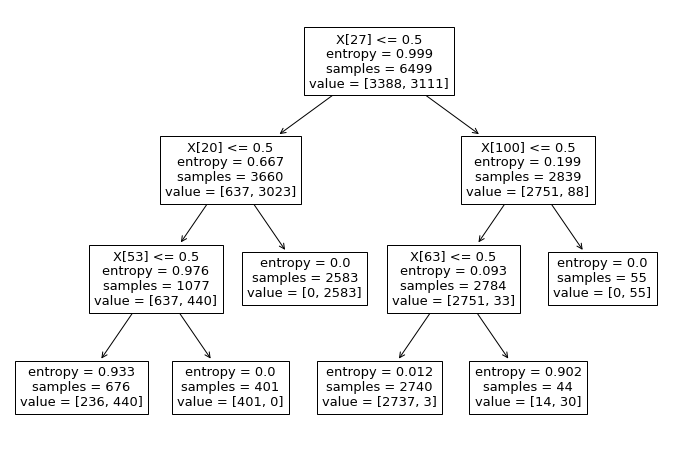

In [116]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [117]:
#Predict the values 
y_pred_en = clf_en.predict(X_test)

In [118]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)

In [119]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9637
Training-set accuracy score: 0.9611


Here also the accuracy of the model and training set indicates there is no sign of overfitting.

# **Confusion Matrix**

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [121]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[766  54]
 [  5 800]]


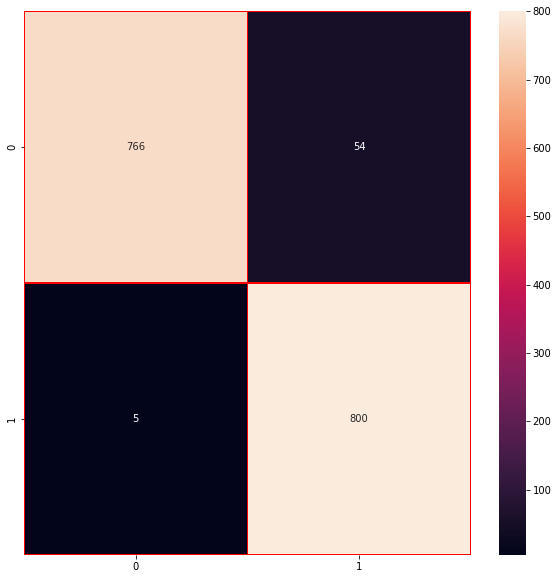

<Figure size 432x288 with 0 Axes>

In [122]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [123]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       820
           1       0.94      0.99      0.96       805

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625



In [124]:
f1_score = f1_score(y_test, y_pred_en)
print("F1 Score:",f1_score)

F1 Score: 0.9644364074743822


## **Conclusion**

Decision-Tree Classifier model using both gini index and entropy have only very very small difference in model accuracy and training set accuracy, so there is no sign of overfitting.